<a href="https://colab.research.google.com/github/ManjuVijayakumar/GRIP-Tasks/blob/main/PGPDSBA_LVC_ML_July_2022_Airline_Twitter_Sentiment_Analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import re
import nltk # Natural Language Tool Kit
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Airline_tweets = pd.read_csv("twitter-airline-sentiment.csv")

In [ ]:
Airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
Airline_tweets.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [ ]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
## Let's get the count of tweets for each Airline
print(Airline_tweets['airline'].nunique())
print(Airline_tweets['airline'].value_counts().sort_values())

6
Virgin America     504
Delta             2222
Southwest         2420
American          2759
US Airways        2913
United            3822
Name: airline, dtype: int64


In [ ]:
((Airline_tweets.isnull().sum() / Airline_tweets.index.size) * 100).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [ ]:
Airline_tweets.drop(['tweet_coord'], axis = 1,inplace=True)
Airline_tweets.drop(['airline_sentiment_gold'], axis = 1,inplace=True)
Airline_tweets.drop(['negativereason_gold'], axis = 1,inplace=True)
Airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


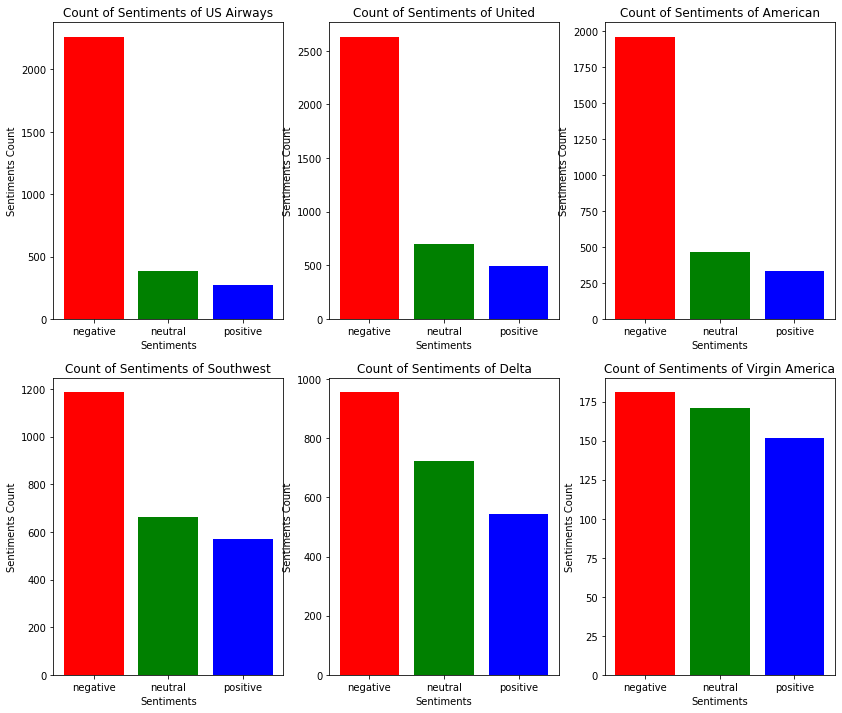

In [ ]:
# As the data set has data for 6 airlines, let's get a count of positive, negative and neutral for each airline

airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(14, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=Airline_tweets[Airline_tweets['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Sentiments Count')
    plt.xlabel('Sentiments')
    plt.title('Count of Sentiments of '+i)

In [ ]:
# Basic Exploration in Text Mining

# Let's get a word count without writing a lambda function

Airline_tweets['totalwords'] = [len(x.split()) for x in Airline_tweets['text'].tolist()]
Airline_tweets[['text','totalwords']].head()

,text,totalwords
0,@VirginAmerica What @dhepburn said.,4
1,@VirginAmerica plus you've added commercials t...,9
2,@VirginAmerica I didn't today... Must mean I n...,12
3,@VirginAmerica it's really aggressive to blast...,17
4,@VirginAmerica and it's a really big bad thing...,10


In [ ]:
# Number of Characters- including spaces

Airline_tweets['char_count'] = Airline_tweets['text'].str.len() ## this also includes spaces
Airline_tweets[['text','char_count']].head()

,text,char_count
0,@VirginAmerica What @dhepburn said.,35
1,@VirginAmerica plus you've added commercials t...,72
2,@VirginAmerica I didn't today... Must mean I n...,71
3,@VirginAmerica it's really aggressive to blast...,126
4,@VirginAmerica and it's a really big bad thing...,55


In [ ]:
# Calculate avg length of a word

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

Airline_tweets['avg_word'] = Airline_tweets['text'].apply(lambda x: avg_word(x))
Airline_tweets[['text','avg_word']].head()

,text,avg_word
0,@VirginAmerica What @dhepburn said.,8.000000
1,@VirginAmerica plus you've added commercials t...,7.111111
2,@VirginAmerica I didn't today... Must mean I n...,5.000000
3,@VirginAmerica it's really aggressive to blast...,6.470588
4,@VirginAmerica and it's a really big bad thing...,4.600000


In [ ]:
# Analyze the stopwords in each tweet

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
Airline_tweets['stopwords'] = Airline_tweets['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
Airline_tweets[['text','stopwords']].head()

,text,stopwords
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,3
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,6
4,@VirginAmerica and it's a really big bad thing...,5


In [ ]:
# Special character - @

Airline_tweets['hastags'] = Airline_tweets['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
Airline_tweets[['text','hastags']].head()

,text,hastags
0,@VirginAmerica What @dhepburn said.,2
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,1
4,@VirginAmerica and it's a really big bad thing...,1


In [ ]:
# digits analysis

Airline_tweets['numerics'] = Airline_tweets['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
Airline_tweets[['text','numerics']].head(20)

,text,numerics
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,0
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
5,@VirginAmerica seriously would pay $30 a fligh...,0
6,"@VirginAmerica yes, nearly every time I fly VX...",0
7,@VirginAmerica Really missed a prime opportuni...,0
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",0
9,"@VirginAmerica it was amazing, and arrived an ...",0


In [ ]:
# Uppercase

Airline_tweets['upper'] = Airline_tweets['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
Airline_tweets[['text','upper']].head()

,text,upper
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,0
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


In [ ]:
# Let's get an idea of most frequently used words in negative tweets:

from wordcloud import WordCloud,STOPWORDS
new_df=Airline_tweets[Airline_tweets['airline_sentiment']=='negative']

words = ' '.join(new_df['text'])

In [ ]:
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

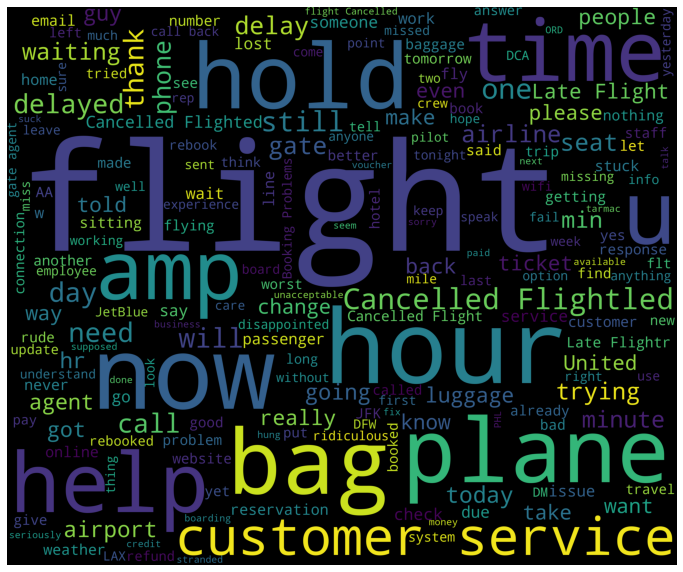

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
Airline_tweets['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

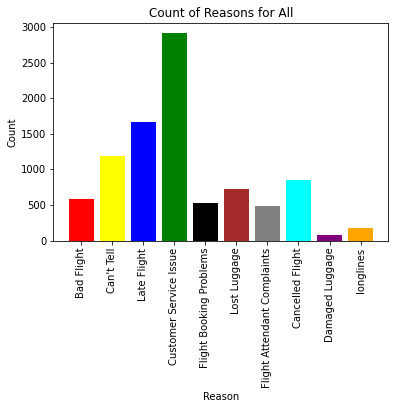

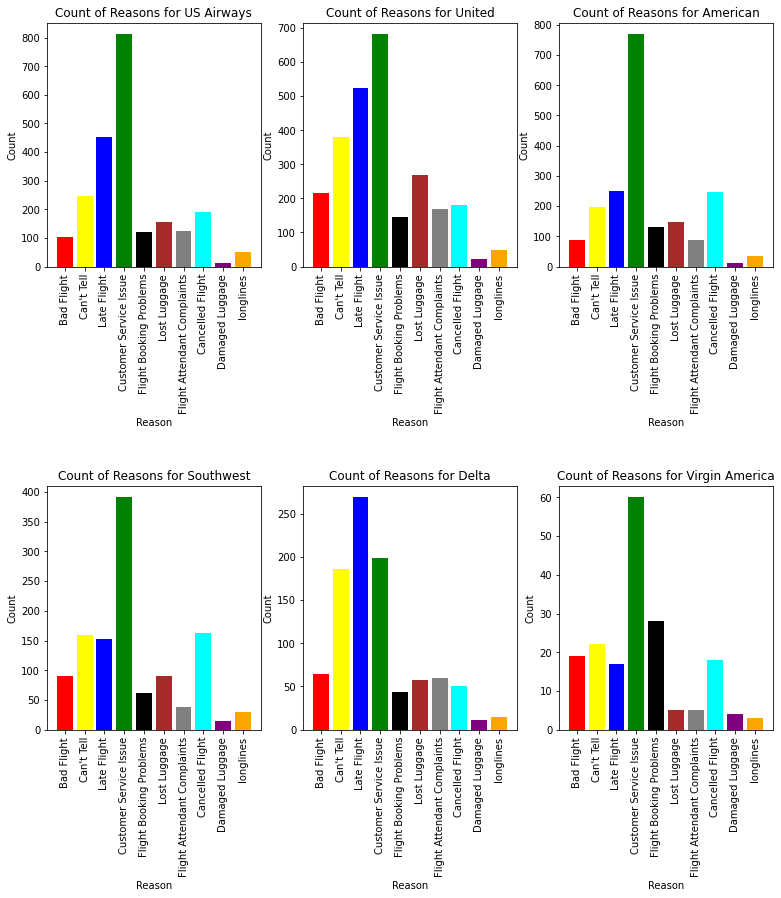

In [ ]:
Airline_tweets['negativereason'].nunique()

NR_Count=dict(Airline_tweets['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=Airline_tweets
    else:
        a=Airline_tweets[Airline_tweets['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(Airline_tweets['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

In [ ]:
# Basic Pre-processing

# Converting to lowercase

Airline_tweets['Tweet'] = Airline_tweets['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Airline_tweets['Tweet'].head()

0                  @virginamerica what @dhepburn said.
1    @virginamerica plus you've added commercials t...
2    @virginamerica i didn't today... must mean i n...
3    @virginamerica it's really aggressive to blast...
4    @virginamerica and it's a really big bad thing...
Name: Tweet, dtype: object

In [ ]:
# Remove punctuations

Airline_tweets['Tweet'] = Airline_tweets['Tweet'].str.replace('[^\w\s]','')
Airline_tweets['Tweet'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: Tweet, dtype: object

In [ ]:
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Airline_tweets['Tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus youve added commercials exp...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

In [ ]:
# Removing extremely popular words that do not contribute for sentiment analysis


freq = pd.Series(' '.join(Airline_tweets['Tweet']).split()).value_counts()[:30]
freq


united           4143
flight           3873
usairways        3051
americanair      2957
southwestair     2452
jetblue          2361
get              1334
thanks           1072
cancelled        1056
service           956
help              855
time              770
im                764
customer          746
us                679
hours             669
flights           646
2                 644
amp               638
hold              637
plane             618
thank             602
cant              578
still             568
please            560
one               558
need              553
would             548
delayed           529
virginamerica     521
dtype: int64

In [ ]:
freq =['flight','2']

Airline_tweets['Tweet'] = Airline_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Airline_tweets['Tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus youve added commercials exp...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

In [ ]:
freq = pd.Series(' '.join(Airline_tweets['Tweet']).split()).value_counts()[-10:]
freq

6yearold             1
portrayed            1
integrating          1
clowns               1
433                  1
milwaukee            1
httptco07xhcacjax    1
supporter            1
jesus                1
blackberry10         1
dtype: int64

In [ ]:
from nltk.stem import PorterStemmer

st = PorterStemmer()
Airline_tweets['Tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                          virginamerica dhepburn said
1      virginamerica plu youv ad commerci experi tacki
2    virginamerica didnt today must mean need take ...
3    virginamerica realli aggress blast obnoxi ente...
4                   virginamerica realli big bad thing
Name: Tweet, dtype: object

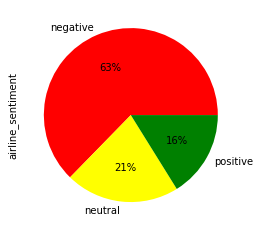

In [ ]:
# Let's look at the overall distribution of positive, negative and neutral sentiments

Airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red","yellow","green"])

In [ ]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
 12  totalwords                    14640 non-null  int64  
 13  c

In [ ]:
processed_features = Airline_tweets.iloc[:, 19].values
labels = Airline_tweets.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(min_df = 5 , max_df = 0.8, stop_words='english', ngram_range=(1,3) , max_features= 100)

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
X_train

<11712x100 sparse matrix of type '<class 'numpy.float64'>'
	with 38545 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train)

  (0, 37)	0.6075832881727783
  (0, 99)	0.6905283609646834
  (0, 48)	0.3924450670305113
  (1, 81)	0.3972734467390353
  (1, 2)	0.4557572472594063
  (1, 5)	0.41491608003641534
  (1, 88)	0.4571907556010691
  (1, 99)	0.5032697086123439
  (2, 9)	0.5884490571041718
  (2, 46)	0.47332288123829735
  (2, 60)	0.5957085139919504
  (2, 88)	0.27354071661635726
  (3, 50)	0.5561060233638044
  (3, 44)	0.4980880437792367
  (3, 9)	0.6033235541278437
  (3, 88)	0.28045513091618807
  (4, 79)	0.8940602050750958
  (4, 4)	0.44794681570592465
  (5, 19)	0.5050166838664104
  (5, 11)	0.38184443237885307
  (5, 95)	0.5115720797730897
  (5, 38)	0.503336335283813
  (5, 76)	0.2899991711325087
  (6, 89)	0.4615656585183839
  (6, 9)	0.8871060493968524
  :	:
  (11703, 30)	0.8210946049056251
  (11703, 48)	0.5707921248535891
  (11704, 58)	0.7116412859346143
  (11704, 41)	0.5968369251621873
  (11704, 89)	0.3706107997836465
  (11705, 27)	0.5971293196211228
  (11705, 65)	0.47354635857155153
  (11705, 98)	0.5779869763606388
  (11

In [ ]:
# RF

from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=200, random_state=0, max_depth= 10)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [ ]:
## Performance Matrix on train data set
from sklearn import metrics
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.688353825136612
[[7234    4   70]
 [2337   24  124]
 [1115    0  804]]
              precision    recall  f1-score   support

    negative       0.68      0.99      0.80      7308
     neutral       0.86      0.01      0.02      2485
    positive       0.81      0.42      0.55      1919

    accuracy                           0.69     11712
   macro avg       0.78      0.47      0.46     11712
weighted avg       0.74      0.69      0.60     11712



In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6830601092896175
[[1835    2   33]
 [ 580    3   31]
 [ 282    0  162]]
              precision    recall  f1-score   support

    negative       0.68      0.98      0.80      1870
     neutral       0.60      0.00      0.01       614
    positive       0.72      0.36      0.48       444

    accuracy                           0.68      2928
   macro avg       0.67      0.45      0.43      2928
weighted avg       0.67      0.68      0.59      2928



In [ ]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier(random_state=1)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8576673497267759
[[6914  338   56]
 [ 681 1700  104]
 [ 245  243 1431]]
              precision    recall  f1-score   support

    negative       0.88      0.95      0.91      7308
     neutral       0.75      0.68      0.71      2485
    positive       0.90      0.75      0.82      1919

    accuracy                           0.86     11712
   macro avg       0.84      0.79      0.81     11712
weighted avg       0.86      0.86      0.85     11712



In [ ]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6656420765027322
[[1504  258  108]
 [ 323  237   54]
 [ 150   86  208]]
              precision    recall  f1-score   support

    negative       0.76      0.80      0.78      1870
     neutral       0.41      0.39      0.40       614
    positive       0.56      0.47      0.51       444

    accuracy                           0.67      2928
   macro avg       0.58      0.55      0.56      2928
weighted avg       0.66      0.67      0.66      2928



In [ ]:
def Tweet(x):
    if x == "positive":
        return "Non-Negative"
    elif x == 'neutral':
        return "Non-Negative"
    else: return "Negative"

In [ ]:
Airline_tweets["M-Sentiment"] = Airline_tweets["airline_sentiment"].apply(Tweet)

Airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,...,user_timezone,totalwords,char_count,avg_word,stopwords,hastags,numerics,upper,Tweet,M-Sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,...,Eastern Time (US & Canada),4,35,8.000000,0,2,0,0,virginamerica dhepburn said,Non-Negative
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,...,Pacific Time (US & Canada),9,72,7.111111,3,1,0,0,virginamerica plus youve added commercials exp...,Non-Negative
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,...,Central Time (US & Canada),12,71,5.000000,2,1,0,2,virginamerica didnt today must mean need take ...,Non-Negative
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,...,Pacific Time (US & Canada),17,126,6.470588,6,1,0,0,virginamerica really aggressive blast obnoxiou...,Negative
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,...,Pacific Time (US & Canada),10,55,4.600000,5,1,0,0,virginamerica really big bad thing,Negative


In [ ]:
Airline_tweets["M-Sentiment"].value_counts()

Negative        9178
Non-Negative    5462
Name: M-Sentiment, dtype: int64

In [ ]:
X_train.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.69052836],
       [0.        , 0.        , 0.45575725, ..., 0.        , 0.        ,
        0.50326971],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.89309582,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.46525926, ..., 0.        , 0.51854702,
        0.        ]])